In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_results = pd.read_csv("/results/full_results_fs.csv", index_col=0)

In [4]:
df_results

,key,mse_A549,mse_K562,mse_MCF7,css_A549,css_K562,css_MCF7,r2_A549,r2_K562,r2_MCF7,...,rank_logfc_MCF7,edistance_A549,edistance_K562,edistance_MCF7,logfc_corr_A549,logfc_corr_K562,logfc_corr_MCF7,top_logfc_corr_A549,top_logfc_corr_K562,top_logfc_corr_MCF7
0,null_random,0.000554,0.000545,0.000420,0.972774,0.966300,0.981468,0.940444,0.924894,0.959715,...,0.490991,2.216744,2.178087,1.678431,0.272183,0.267916,0.253435,0.283924,0.253293,0.221893
1,mean_random,0.000352,0.000311,0.000251,0.983406,0.981082,0.989391,0.963245,0.958565,0.976555,...,0.500000,1.408850,1.242186,1.002391,0.452845,0.463792,0.472447,0.579678,0.476211,0.559325
2,decoder_random,0.000325,0.000318,0.000245,0.984144,0.980262,0.989742,0.964355,0.956345,0.976227,...,0.483483,1.299384,1.270152,0.979138,0.457594,0.475613,0.409078,0.560255,0.525379,0.462541
3,mlp_random,0.000292,0.000299,0.000220,0.985782,0.981405,0.990927,0.967869,0.958724,0.978528,...,0.505255,1.167027,1.197406,0.880036,0.528047,0.519569,0.458337,0.628469,0.586547,0.496411
4,prnet_random,0.000701,0.000676,0.000650,0.964053,0.956430,0.970166,0.920978,0.904920,0.934864,...,0.503003,2.805075,2.705922,2.600448,0.396378,0.409798,0.410410,0.521301,0.433250,0.511189
5,null_seurat,0.001346,0.001626,0.000946,0.946077,0.941287,0.949636,0.872321,0.845971,0.905055,...,0.503003,5.383710,6.503470,3.785609,0.299598,0.252772,0.245466,0.259141,0.192141,0.242769
6,mean_seurat,0.001061,0.001121,0.000820,0.956320,0.958124,0.956981,0.897283,0.891037,0.923269,...,0.500000,4.242664,4.485267,3.278245,0.489117,0.488451,0.513153,0.629097,0.493889,0.595840
7,decoder_seurat,0.000761,0.000967,0.000551,0.967947,0.963783,0.970850,0.929387,0.910253,0.938835,...,0.448949,3.042480,3.867427,2.204425,0.517287,0.467565,0.470759,0.619573,0.499896,0.501437
8,mlp_seurat,0.000686,0.000867,0.000492,0.969978,0.967226,0.974309,0.935904,0.919166,0.945160,...,0.443694,2.742761,3.469817,1.969946,0.548069,0.510060,0.512484,0.624452,0.532070,0.522191
9,prnet_seurat,0.001260,0.001864,0.000875,0.947442,0.929093,0.950202,0.882049,0.829081,0.907197,...,0.433934,5.041051,7.456276,3.501519,0.434161,0.435947,0.458190,0.564691,0.460471,0.559087


In [12]:
def plot_featselection(df_results, metric):
    df = df_results[['key', f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7']]
    df['fs_method'] = [x.split("_")[1] for x in df['key']]
    df['model_name'] = [x.split("_")[0] for x in df['key']]
    df[f'{metric}_avg'] = df[[f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7']].mean(axis=1)

    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=df,
        x="model_name",
        y=f"{metric}_avg",
        hue="fs_method",
    )
    plt.ylabel(f"{metric}")
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.legend(title="Feature Selection Method")
    plt.tight_layout()
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fs_method'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

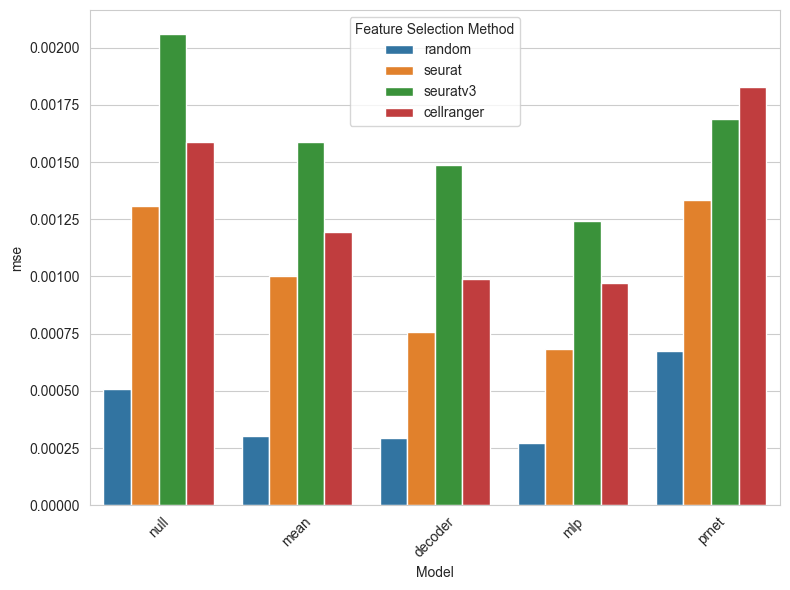

In [13]:
plot_featselection(df_results, 'mse')

C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fs_method'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

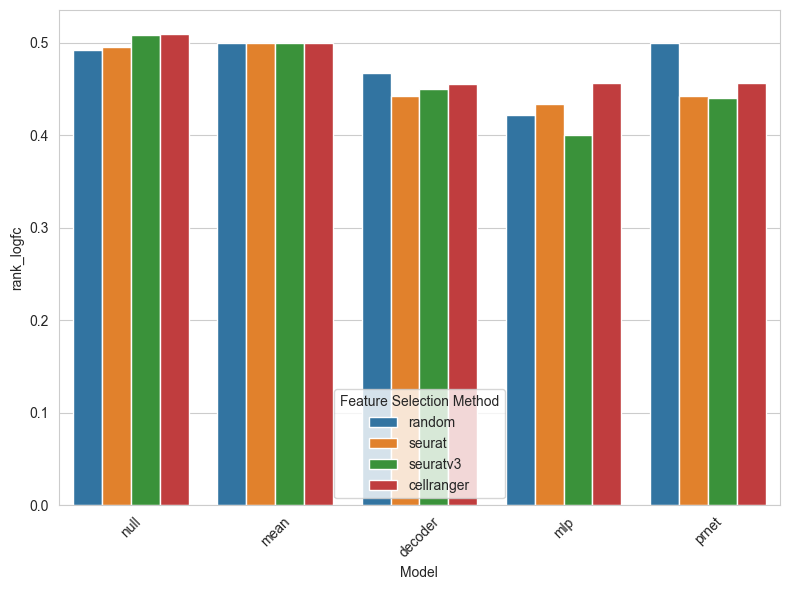

In [15]:
plot_featselection(df_results, 'rank_logfc')

C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fs_method'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\2382441273.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

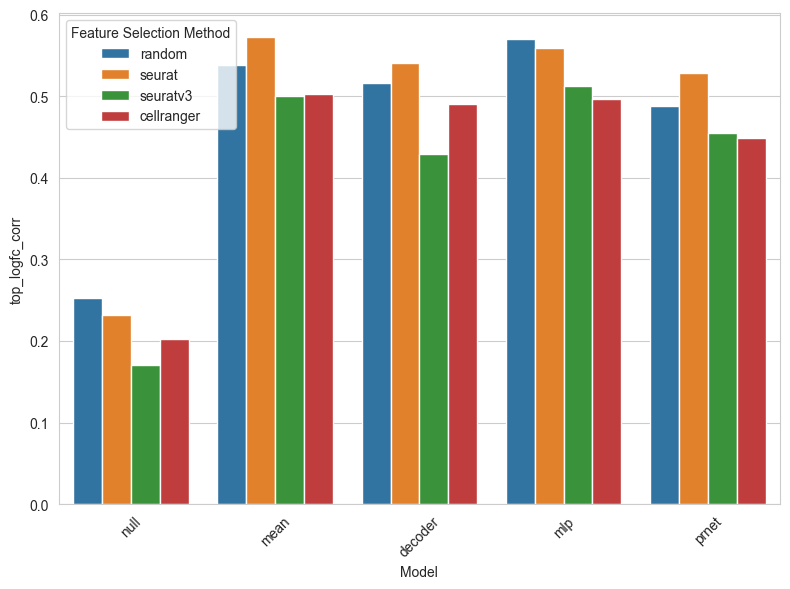

In [16]:
plot_featselection(df_results, 'top_logfc_corr')

In [6]:
df_mse = df_results[['key', 'mse_A549', 'mse_K562', 'mse_MCF7']]
df_mse['fs_method'] = [x.split("_")[1] for x in df_mse['key']]
df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]

df_mse['mse_avg'] = df_mse[['mse_A549', 'mse_K562', 'mse_MCF7']].mean(axis=1)

C:\Users\admin\AppData\Local\Temp\ipykernel_25456\104379115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['fs_method'] = [x.split("_")[1] for x in df_mse['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\104379115.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_25456\104379115.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

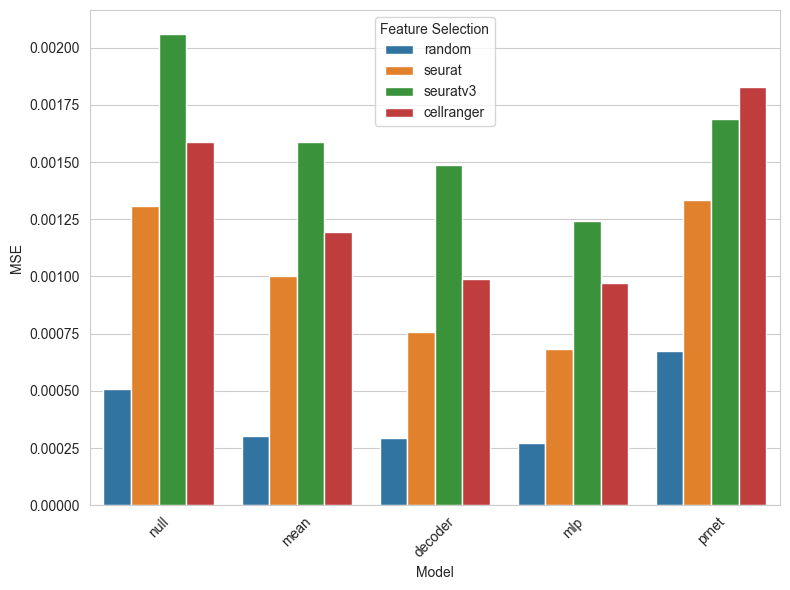

In [9]:

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_mse,
    x="model_name",
    y="mse_avg",
    hue="fs_method",
)
plt.ylabel("MSE")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Feature Selection")
plt.tight_layout()
plt.show()

In [5]:
df_melted_mse = df_mse.melt(
    id_vars=["fs_method", "model_name"],
    value_vars=["mse_A549", "mse_K562", "mse_MCF7"],
    var_name="cell_type",
    value_name="mse"
)

df_melted_mse["cell_type"] = df_melted_mse["cell_type"].str.replace("mse_", "")

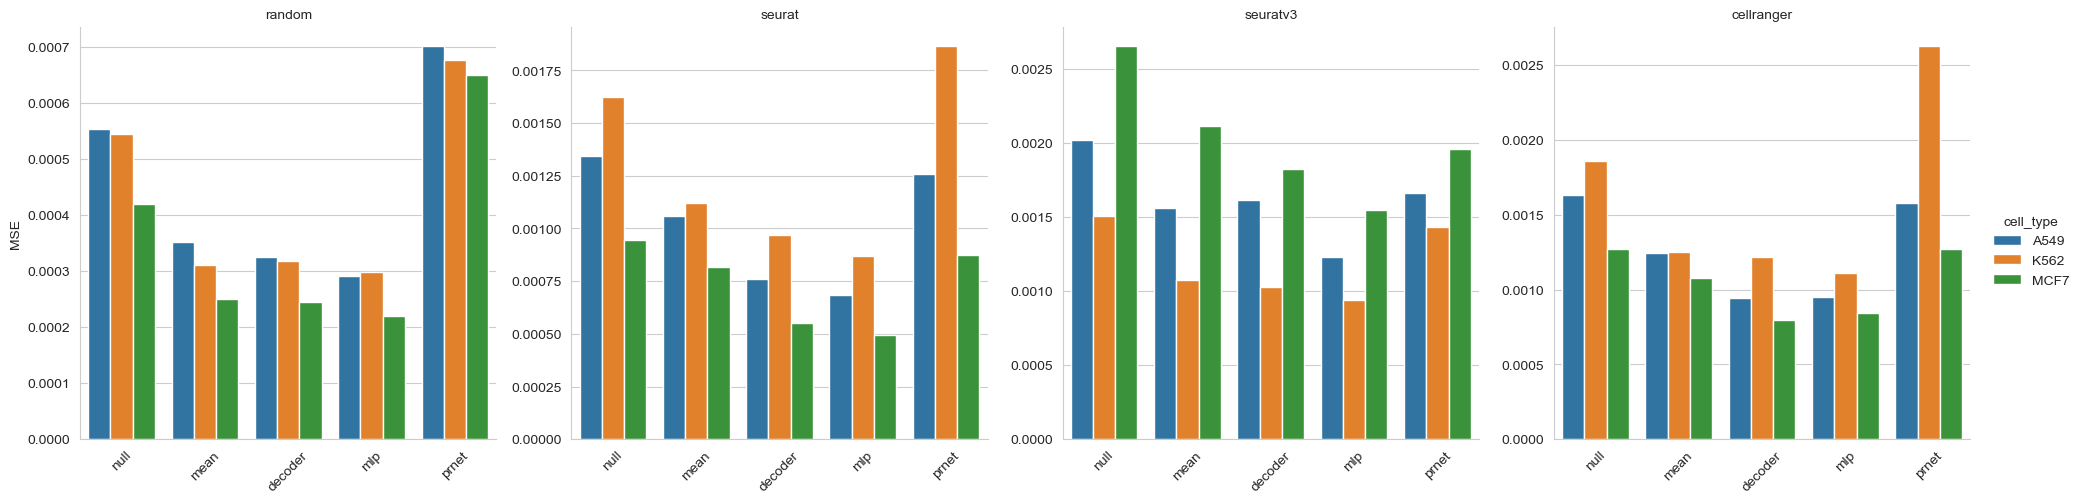

In [6]:
g = sns.catplot(
    data=df_melted_mse,
    x="model_name",
    y="mse",
    hue="cell_type",
    col="fs_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "MSE")
g.set_xticklabels(rotation=45)
plt.show()

In [7]:
df_ranklfc = df_results[['key', 'rank_logfc_A549', 'rank_logfc_K562', 'rank_logfc_MCF7']]
df_ranklfc['fs_method'] = [x.split("_")[1] for x in df_ranklfc['key']]
df_ranklfc['model_name'] = [x.split("_")[0] for x in df_ranklfc['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_2200\3199093831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranklfc['fs_method'] = [x.split("_")[1] for x in df_ranklfc['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_2200\3199093831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ranklfc['model_name'] = [x.split("_")[0] for x in df_ranklfc['key']]


In [8]:
df_melted_ranklfc = df_ranklfc.melt(
    id_vars=["fs_method", "model_name"],
    value_vars=["rank_logfc_A549", "rank_logfc_K562", "rank_logfc_MCF7"],
    var_name="cell_type",
    value_name="rank_logfc"
)

df_melted_ranklfc["cell_type"] = df_melted_ranklfc["cell_type"].str.replace("rank_logfc_", "")

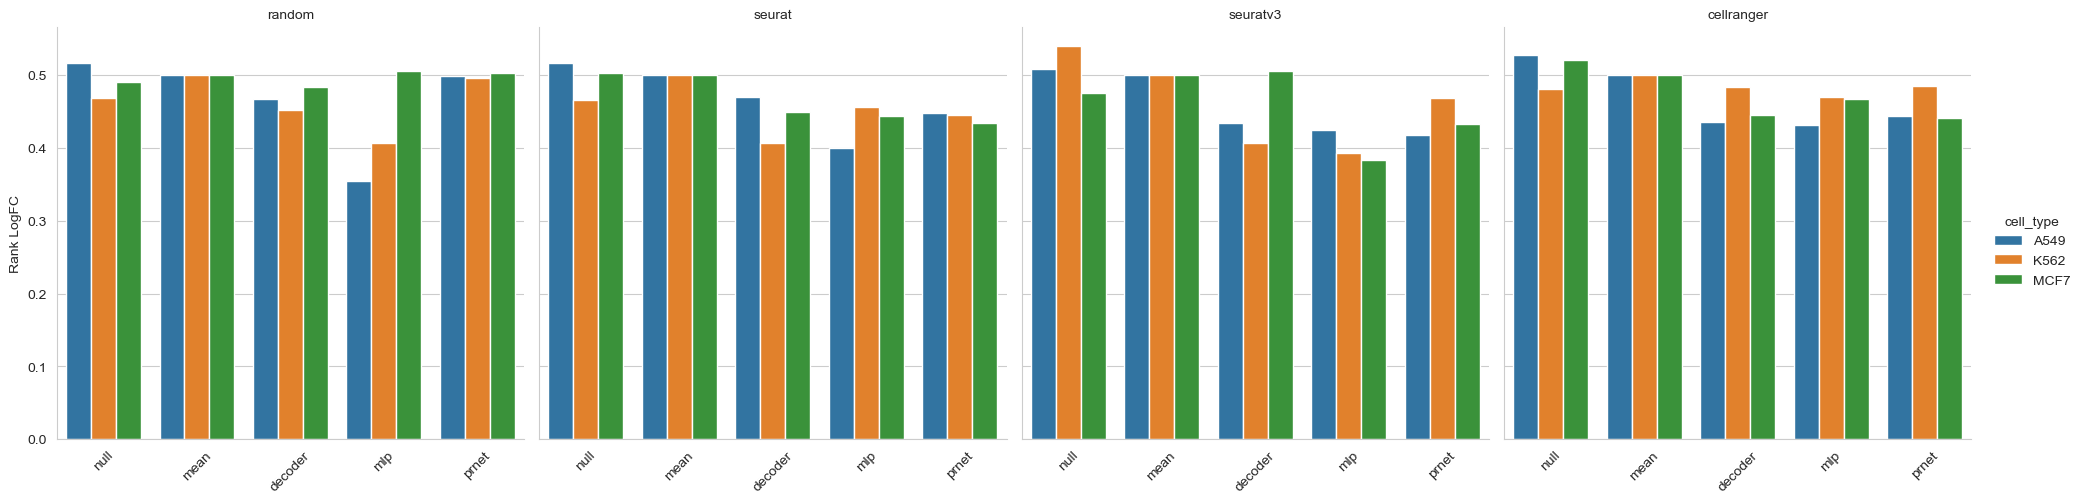

In [10]:
g = sns.catplot(
    data=df_melted_ranklfc,
    x="model_name",
    y="rank_logfc",
    hue="cell_type",
    col="fs_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=True,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "Rank LogFC")
g.set_xticklabels(rotation=45)
plt.show()

In [11]:
df_toplogfc_corr = df_results[['key', 'top_logfc_corr_A549', 'top_logfc_corr_K562', 'top_logfc_corr_MCF7']]
df_toplogfc_corr['fs_method'] = [x.split("_")[1] for x in df_toplogfc_corr['key']]
df_toplogfc_corr['model_name'] = [x.split("_")[0] for x in df_toplogfc_corr['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_2200\262208525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplogfc_corr['fs_method'] = [x.split("_")[1] for x in df_toplogfc_corr['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_2200\262208525.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplogfc_corr['model_name'] = [x.split("_")[0] for x in df_toplogfc_corr['key']]


In [12]:
df_melted_toplfc_corr = df_toplogfc_corr.melt(
    id_vars=["fs_method", "model_name"],
    value_vars=["top_logfc_corr_A549", "top_logfc_corr_K562", "top_logfc_corr_MCF7"],
    var_name="cell_type",
    value_name="top_logfc_corr"
)

df_melted_toplfc_corr["cell_type"] = df_melted_toplfc_corr["cell_type"].str.replace("top_logfc_corr", "")

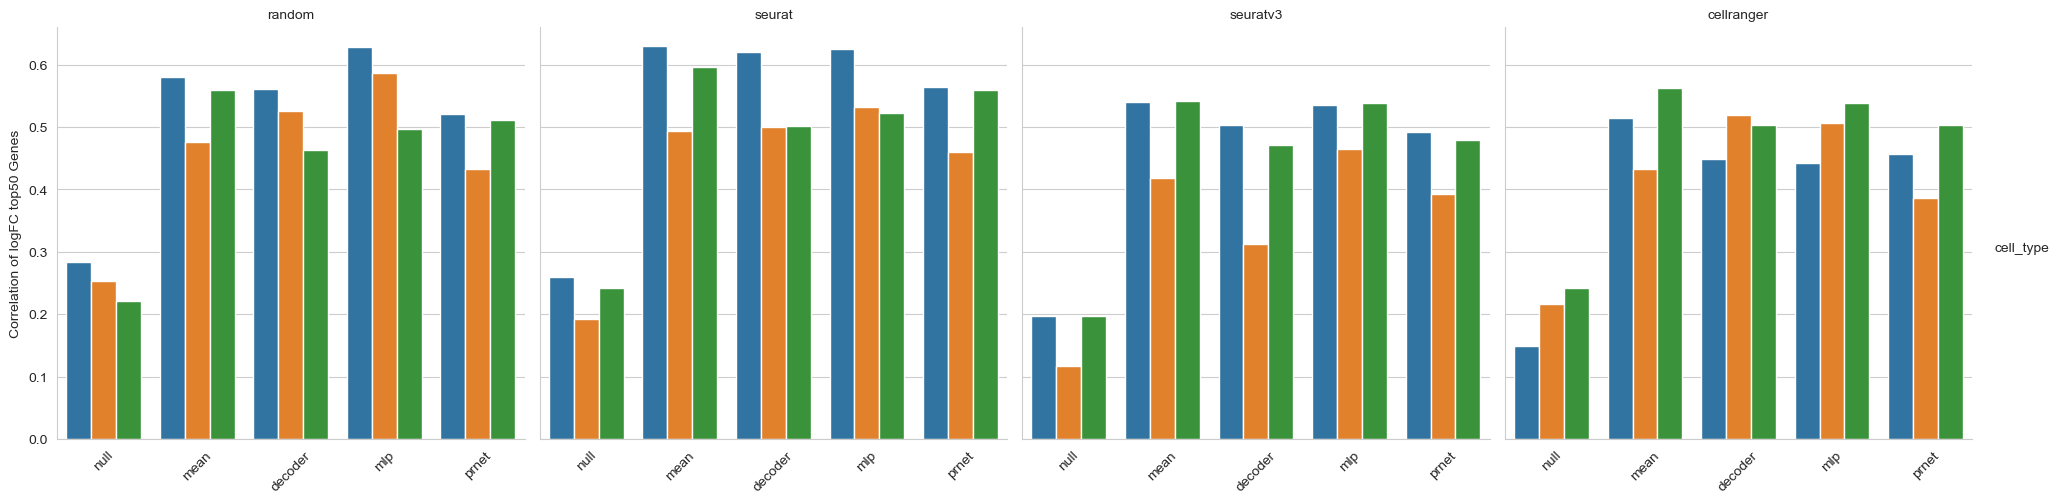

In [14]:
g = sns.catplot(
    data=df_melted_toplfc_corr,
    x="model_name",
    y="top_logfc_corr",
    hue="cell_type",
    col="fs_method",
    kind="bar",
    height=5,
    aspect=1,
    sharey=True,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "Correlation of logFC top50 Genes")
g.set_xticklabels(rotation=45)
plt.show()